In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from matplotlib.patches import Patch
import geopandas as gpd
from matplotlib import patheffects

In [15]:
data = pd.read_csv('DADOS/MICRODADOS_ENEM_2023.csv', encoding='latin1',  delimiter=';')

In [16]:
data.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [17]:
# Listar todas as colunas
data.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

- **NU_INSCRICAO**: Número de inscrição do participante do ENEM.
- **NU_ANO**: Ano de realização do exame.
- **TP_FAIXA_ETARIA**: Faixa etária do participante.
- **TP_SEXO**: Sexo do participante.
- **TP_ESTADO_CIVIL**: Estado civil do participante.
- **TP_COR_RACA**: Cor ou raça do participante.
- **TP_NACIONALIDADE**: Nacionalidade do participante.
- **TP_ST_CONCLUSAO**: Situação de conclusão do Ensino Médio.
- **TP_ANO_CONCLUIU**: Ano de conclusão do Ensino Médio.
- **TP_ESCOLA**: Tipo de escola do Ensino Médio.
- **TP_ENSINO**: Tipo de ensino do Ensino Médio que frequentou.
- **IN_TREINEIRO**: Indica se o participante fez o exame como treineiro (sem valer aprovação).
- **CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC**: Código e nome do município da escola, código e sigla da UF da escola.
- **TP_DEPENDENCIA_ADM_ESC**: Dependência administrativa da escola (federal, estadual, municipal, privada).
- **TP_LOCALIZACAO_ESC**: Localização da escola (urbana ou rural).
- **TP_SIT_FUNC_ESC**: Situação de funcionamento da escola.
- **CO_MUNICIPIO_PROVA, NO_MUNICIPIO_PROVA, CO_UF_PROVA, SG_UF_PROVA**: Código e nome do município de aplicação da prova, código e sigla da UF de aplicação da prova.
- **TP_PRESENCA_CN, TP_PRESENCA_CH, TP_PRESENCA_LC, TP_PRESENCA_MT**: Presença nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **CO_PROVA_CN, CO_PROVA_CH, CO_PROVA_LC, CO_PROVA_MT**: Código das provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **NU_NOTA_CN, NU_NOTA_CH, NU_NOTA_LC, NU_NOTA_MT**: Notas nas provas de Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática.
- **TX_RESPOSTAS_CN, TX_RESPOSTAS_CH, TX_RESPOSTAS_LC, TX_RESPOSTAS_MT**: Texto das respostas do participante em cada prova.
- **TP_LINGUA**: Língua estrangeira escolhida.
- **TX_GABARITO_CN, TX_GABARITO_CH, TX_GABARITO_LC, TX_GABARITO_MT**: Gabarito das provas.
- **TP_STATUS_REDACAO**: Status da redação (corrigida, anulada, etc.).
- **NU_NOTA_COMP1, NU_NOTA_COMP2, NU_NOTA_COMP3, NU_NOTA_COMP4, NU_NOTA_COMP5**: Notas nas cinco competências da redação.
- **NU_NOTA_REDACAO**: Nota total da redação.
- **Q001 - Q025**: Respostas ao questionário socioeconômico.

In [18]:
# Remover limitador de linha do pandas
pd.set_option('display.max_rows', None)
# Verificar contagem de nulos por coluna
data.isnull().sum()

NU_INSCRICAO                    0
NU_ANO                          0
TP_FAIXA_ETARIA                 0
TP_SEXO                         0
TP_ESTADO_CIVIL                 0
TP_COR_RACA                     0
TP_NACIONALIDADE                0
TP_ST_CONCLUSAO                 0
TP_ANO_CONCLUIU                 0
TP_ESCOLA                       0
TP_ENSINO                 2594874
IN_TREINEIRO                    0
CO_MUNICIPIO_ESC          2975449
NO_MUNICIPIO_ESC          2975449
CO_UF_ESC                 2975449
SG_UF_ESC                 2975449
TP_DEPENDENCIA_ADM_ESC    2975449
TP_LOCALIZACAO_ESC        2975449
TP_SIT_FUNC_ESC           2975449
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_UF_PROVA                     0
SG_UF_PROVA                     0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
CO_PROVA_CN               1241528
CO_PROVA_CH               1111312
CO_PROVA_LC   

# Removendo colunas desnecessárias

In [19]:
# Remover TP_ENSINO pois tem muitos nulos
data = data.drop(columns=['TP_ENSINO'])

# Remover CO_MUNICIPIO_ESC e NO_MUNICIPIO_ESC
data = data.drop(columns=['CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC'])

# Remover CO_UF_ESC e SG_UF_ESC
data = data.drop(columns=['CO_UF_ESC', 'SG_UF_ESC'])

# Remover TP_DEPENDENCIA_ADM_ESC, TP_LOCALIZACAO_ESC, TP_SIT_FUNC_ESC
data = data.drop(columns=['TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC'])

# Remover TP_ST_CONCLUSAO
data = data.drop(columns=['TP_ST_CONCLUSAO'])

# Remover TP_ANO_CONCLUIU
data = data.drop(columns=['TP_ANO_CONCLUIU'])

# Mapeando valores

In [20]:
# Dicionário de mapeamento de faixas etárias
faixa_etaria_map = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

data['Faixa_Etaria_Desc'] = data['TP_FAIXA_ETARIA'].map(faixa_etaria_map)

In [21]:
# Dicionário de mapeamento para cor ou raça
cor_raca_map = {
    0: 'Não declarado',
    1: 'Branca',
    2: 'Preta',
    3: 'Parda',
    4: 'Amarela',
    5: 'Indígena',
    6: 'Não dispõe da informação'
}

data['Cor_Raca_Desc'] = data['TP_COR_RACA'].map(cor_raca_map)

In [22]:
# Dicionário de mapeamento para tipo de escola
tipo_escola_map = {
    1: 'Não Respondeu',
    2: 'Pública',
    3: 'Privada'
}

data['Tipo_Escola_Desc'] = data['TP_ESCOLA'].map(tipo_escola_map)

No ENEM, as provas de Ciências da Natureza, assim como as outras disciplinas, são ofertadas em diferentes versões para atender a diversas necessidades dos participantes.

- **Azul, Amarela, Cinza, Rosa**: Estas são as cores das provas regulares, indicando versões diferentes da prova para garantir a integridade do exame. Cada cor representa um conjunto diferente de questões, embora as questões sejam equivalentes em termos de dificuldade e conteúdo.

- **Ampliada, Superampliada**: Estas versões são destinadas a candidatos com baixa visão. A versão ampliada tem um tamanho de fonte maior, enquanto a superampliada tem um tamanho ainda maior e mais espaço entre as linhas.

- **Braile, Adaptada Ledor**: Provas em braile são para candidatos cegos, e as provas adaptadas ledores são para aqueles que necessitam de assistência para ler ou entender as questões devido a deficiências visuais ou outras condições.

- **Videoprova - Libras**: A videoprova em Libras é uma prova adaptada para candidatos surdos ou com deficiência auditiva, onde as questões são apresentadas em vídeo na Língua Brasileira de Sinais.

- **Reaplicação**: Estas são versões das provas que são aplicadas em datas posteriores para candidatos que tiveram problemas durante a aplicação regular do exame, como problemas logísticos ou de saúde.

In [23]:
# Dicionário de mapeamento para CO_PROVA_CN
prova_cn_map = {
    1221: 'Azul',
    1222: 'Amarela',
    1223: 'Cinza',
    1224: 'Rosa',
    1225: 'Amarela - Ampliada',
    1226: 'Amarela - Superampliada',
    1227: 'Laranja - Braile',
    1228: 'Laranja - Adaptada Ledor',
    1229: 'Verde - Videoprova - Libras',
    1301: 'Azul (Reaplicação)',
    1302: 'Amarela (Reaplicação)',
    1303: 'Cinza (Reaplicação)',
    1304: 'Rosa (Reaplicação)'
}

data['Prova_CN_Desc'] = data['CO_PROVA_CN'].map(prova_cn_map)

In [24]:
# Dicionário de mapeamento para CO_PROVA_CH
prova_ch_map = {
    1191: 'Azul',
    1192: 'Amarela',
    1193: 'Branca',
    1194: 'Rosa',
    1195: 'Amarela - Ampliada',
    1196: 'Amarela - Superampliada',
    1197: 'Laranja - Braile',
    1198: 'Laranja - Adaptada Ledor',
    1199: 'Verde - Videoprova - Libras',
    1271: 'Azul (Reaplicação)',
    1272: 'Amarela (Reaplicação)',
    1273: 'Branca (Reaplicação)',
    1274: 'Rosa (Reaplicação)'
}

data['Prova_CH_Desc'] = data['CO_PROVA_CH'].map(prova_ch_map)

In [25]:
# Dicionário de mapeamento para CO_PROVA_LC
prova_lc_map = {
    1201: 'Azul',
    1202: 'Amarela',
    1203: 'Rosa',
    1204: 'Branca',
    1205: 'Amarela - Ampliada',
    1206: 'Amarela - Superampliada',
    1207: 'Laranja - Braile',
    1208: 'Laranja - Adaptada Ledor',
    1209: 'Verde - Videoprova - Libras',
    1281: 'Azul (Reaplicação)',
    1282: 'Amarela (Reaplicação)',
    1283: 'Rosa (Reaplicação)',
    1284: 'Branca (Reaplicação)'
}

data['Prova_LC_Desc'] = data['CO_PROVA_LC'].map(prova_lc_map)

In [26]:
# Dicionário de mapeamento para CO_PROVA_MT
prova_mt_map = {
    1211: 'Azul',
    1212: 'Amarela',
    1213: 'Rosa',
    1214: 'Cinza',
    1215: 'Amarela - Ampliada',
    1216: 'Amarela - Superampliada',
    1217: 'Laranja - Braile',
    1218: 'Laranja - Adaptada Ledor',
    1219: 'Verde - Videoprova - Libras',
    1291: 'Azul (Reaplicação)',
    1292: 'Amarela (Reaplicação)',
    1293: 'Rosa (Reaplicação)',
    1294: 'Cinza (Reaplicação)'
}

data['Prova_MT_Desc'] = data['CO_PROVA_MT'].map(prova_mt_map)

# Visualização dos dados

<Figure size 1200x600 with 0 Axes>

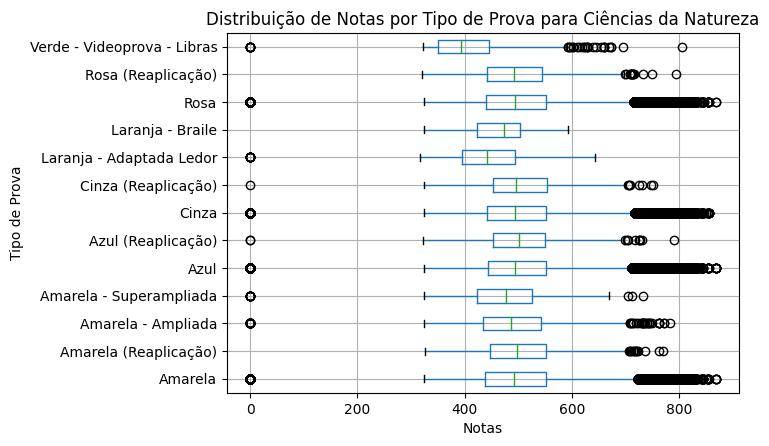

<Figure size 1200x600 with 0 Axes>

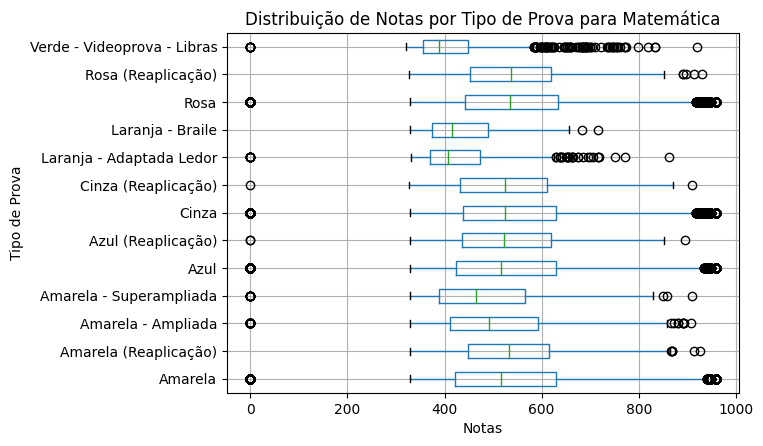

<Figure size 1200x600 with 0 Axes>

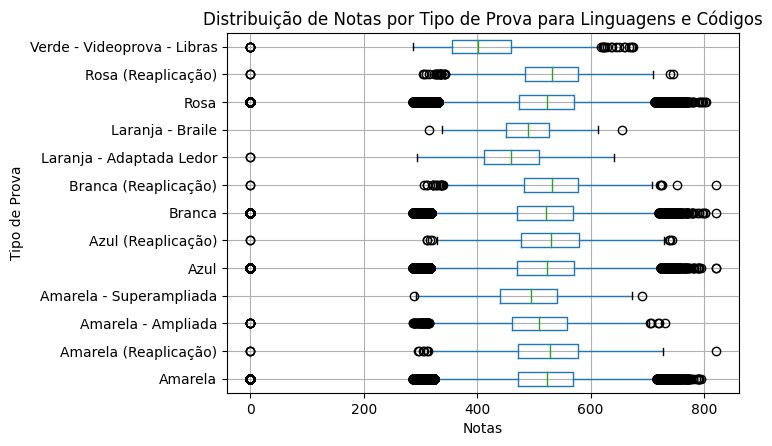

<Figure size 1200x600 with 0 Axes>

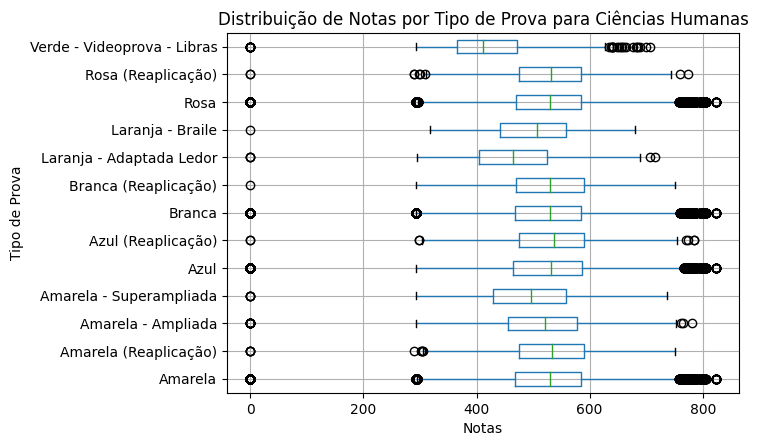

In [29]:
# Lista dos tipos de prova para usar nos filtros e nos plots
tipos_prova = [
    'Azul', 'Amarela', 'Rosa', 'Cinza', 'Amarela - Ampliada', 'Amarela - Superampliada',
    'Laranja - Braile', 'Laranja - Adaptada Ledor', 'Verde - Videoprova - Libras',
    'Azul (Reaplicação)', 'Amarela (Reaplicação)', 'Rosa (Reaplicação)', 'Cinza (Reaplicação)'
]

# Função para plotar boxplots para cada tipo de prova
def plot_boxplots(area, desc_col, nota_col):
    plt.figure(figsize=(12, 6))
    # Filtrar o DataFrame para remover linhas sem notas
    filtered_df = data[data[nota_col].notna()]
    # Boxplot de notas por tipo de prova
    filtered_df.boxplot(column=nota_col, by=desc_col, vert=False)
    plt.title(f'Distribuição de Notas por Tipo de Prova para {area}')
    plt.xlabel('Notas')
    plt.ylabel('Tipo de Prova')
    plt.suptitle('')
    plt.show()

# Plotar boxplots para cada área
plot_boxplots('Ciências da Natureza', 'Prova_CN_Desc', 'NU_NOTA_CN')
plot_boxplots('Matemática', 'Prova_MT_Desc', 'NU_NOTA_MT')
plot_boxplots('Linguagens e Códigos', 'Prova_LC_Desc', 'NU_NOTA_LC')
plot_boxplots('Ciências Humanas', 'Prova_CH_Desc', 'NU_NOTA_CH')

**Dispersão**: Para a prova de Ciências da Natureza e de Linguagens e Códigos temos uma menor dispersão de notas, o intervalo interquartil é menor para todos os tipos de prova, o que indica que as notas estão mais agrupadas em torno da mediana. Já em Matemática e Ciências Humanas, a dispersão é maior, o que indica que as notas estão mais espalhadas.

**Desempenho**: É possível observar que no geral o desemepnho é o mesmo, com uma exceção para o tipo Verde e Laranja onde o IQR é mais deslocado para a esquerda indicando notas menores como um todo.

c:\Users\arthu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


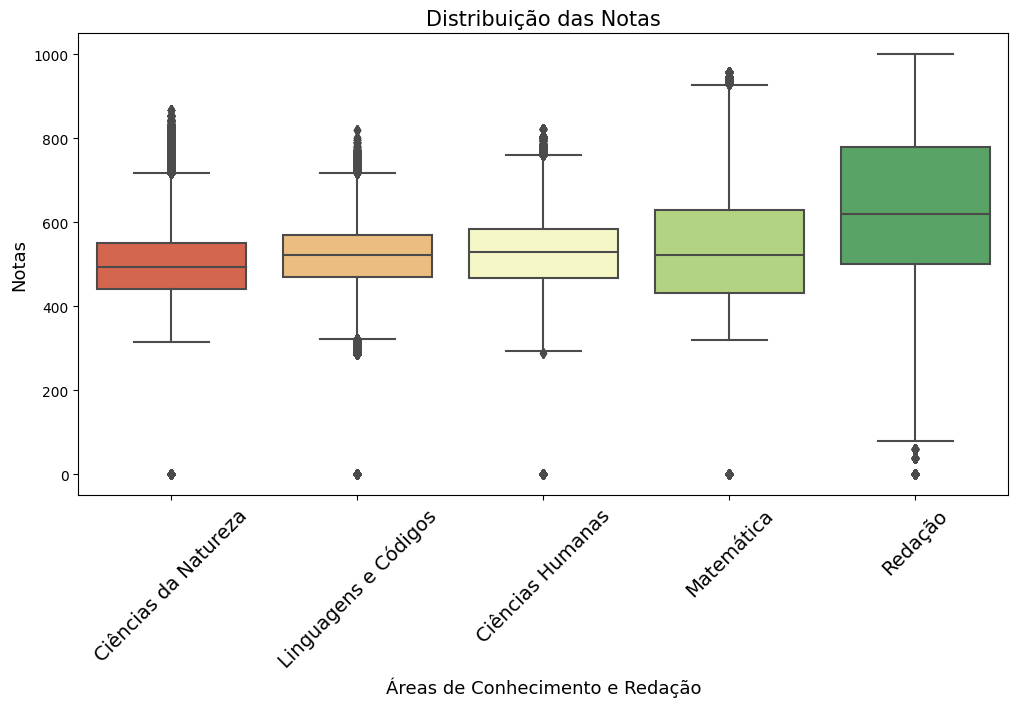

In [38]:
# Selecionar as colunas de notas das disciplinas e redação
notas_disciplinas = ['NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_MT']
nota_redacao = 'NU_NOTA_REDACAO'

# Criar um DataFrame com as notas
notas_df = data[notas_disciplinas + [nota_redacao]]

# Rótulos das disciplinas e redação
labels = ['Ciências da Natureza', 'Linguagens e Códigos', 'Ciências Humanas', 'Matemática', 'Redação']

# Definir paleta de cores
cores = sns.color_palette("RdYlGn", n_colors=len(labels))

# Plotar boxplot das notas com rótulos personalizados e cores destacando a ordenação
plt.figure(figsize=(12, 6))
sns.boxplot(data=notas_df, palette=cores)
plt.xticks(rotation=45, fontsize=14)
plt.title('Distribuição das Notas', fontsize=15)
plt.xlabel('Áreas de Conhecimento e Redação', fontsize=13)
plt.ylabel('Notas', fontsize=13)
plt.xticks(ticks=range(len(labels)), labels=labels)  # Definir os rótulos no eixo x
plt.show()

Analisando o gráfico de distribuição das notas nas diferentes áreas de conhecimento e redação, podemos fazer as seguintes observações:

**Ciências da Natureza, Linguagens e Códigos, e Ciências Humanas**:
   - **IQR Curto**: Todas essas áreas possuem um intervalo interquartil (IQR) curto, indicando que a maioria das notas está concentrada em uma faixa estreita. Isso sugere que a variabilidade das notas nessas áreas é relativamente baixa.
   - **Bigodes**: Os bigodes dessas áreas não se estendem muito além dos quartis, reforçando a ideia de menor variabilidade dentro dos dados.
   - **Outliers**: Existem outliers em todas essas áreas, indicando a presença de algumas notas que são significativamente diferentes da maioria.

**Matemática e Redação**:
   - **IQR**: As áreas de Matemática e Redação têm um IQR mais amplo em comparação com as outras áreas, indicando maior variabilidade nas notas.
   - **Bigode Superior Mais Extenso**: Ambas as áreas possuem um bigode superior mais extenso, sugerindo uma assimetria positiva (skewed to the right). Isso significa que há uma cauda mais longa de notas altas, indicando a presença de valores extremos superiores.
   - **Bigode Inferior**: O bigode inferior da Redação é mais longo, indicando que a presença de valores extremos inferiores.
   - **Outliers**: Assim como nas outras áreas, Matemática e Redação também possuem outliers, com algumas notas muito altas ou muito baixas em relação à maioria.

In [63]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
data_filtrada = data.dropna(subset=colunas_notas)

# Definindo as labels para cada coluna para uso no título
labels_dict = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação'
}

def plot_histogram(coluna):
    # Verifica se a coluna é válida
    if coluna not in data_filtrada.columns:
        print(f"Coluna {coluna} não encontrada.")
        return

    # Calcula o número de bins usando a regra de Freedman-Diaconis
    def freedman_diaconis_bins(data):
        Q1, Q3 = np.percentile(data, [25, 75])
        IQR = Q3 - Q1
        bin_width = 2 * IQR / np.cbrt(len(data))
        range_data = np.max(data) - np.min(data)
        num_bins = int(range_data / bin_width)
        return max(1, num_bins)  # Evita ter 0 bins

    num_bins = freedman_diaconis_bins(data_filtrada[coluna])

    # Plotar histograma para a coluna especificada
    plt.figure(figsize=(8, 6))
    sns.histplot(data_filtrada[coluna], kde=False, color='skyblue', bins=num_bins)
    
    # Calcular média e mediana
    mean = data_filtrada[coluna].mean()
    median = data_filtrada[coluna].median()

    # Plotar linhas para média e mediana
    plt.axvline(mean, color='r', linestyle='--', linewidth=1, label=f'Média: {mean:.2f}')
    plt.axvline(median, color='g', linestyle='-', linewidth=1, label=f'Mediana: {median:.2f}')
    
    plt.title(f'Distribuição das Notas de {labels_dict[coluna]}')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

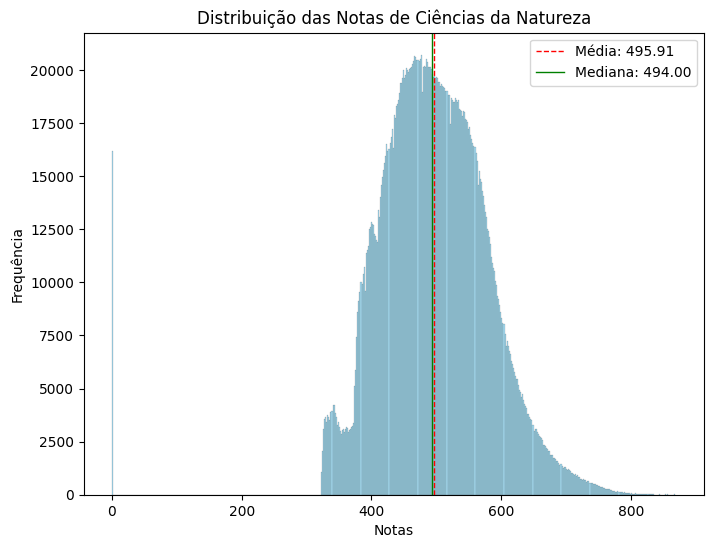

In [64]:
plot_histogram('NU_NOTA_CN')

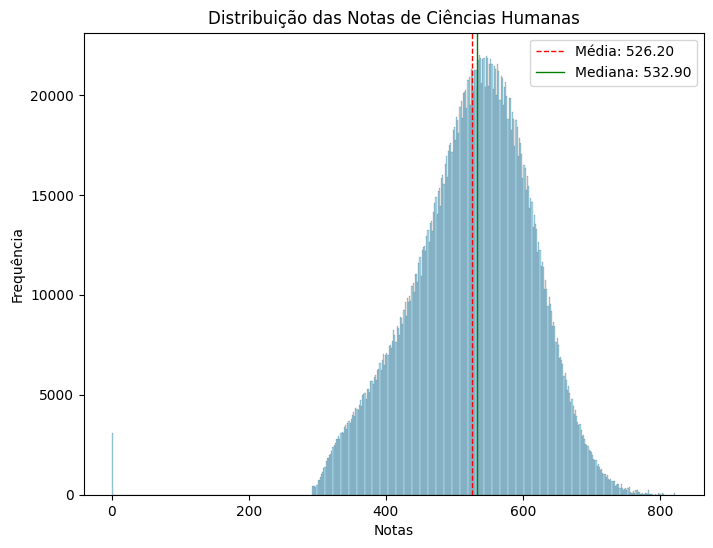

In [65]:
plot_histogram('NU_NOTA_CH')

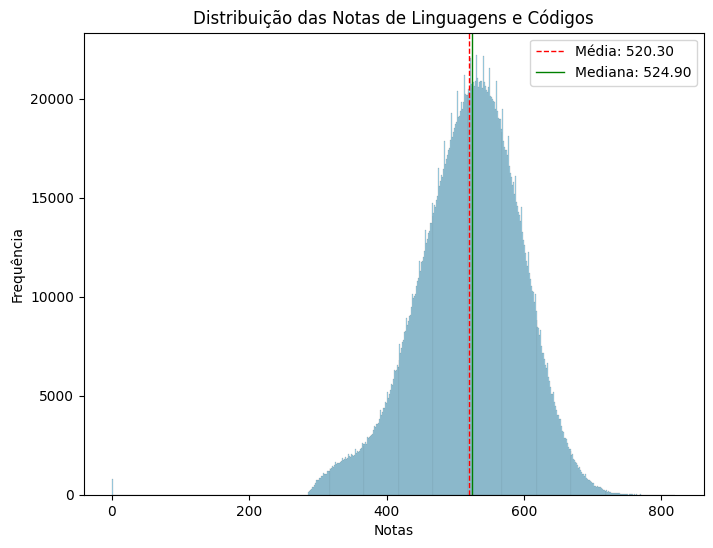

In [66]:
plot_histogram('NU_NOTA_LC')

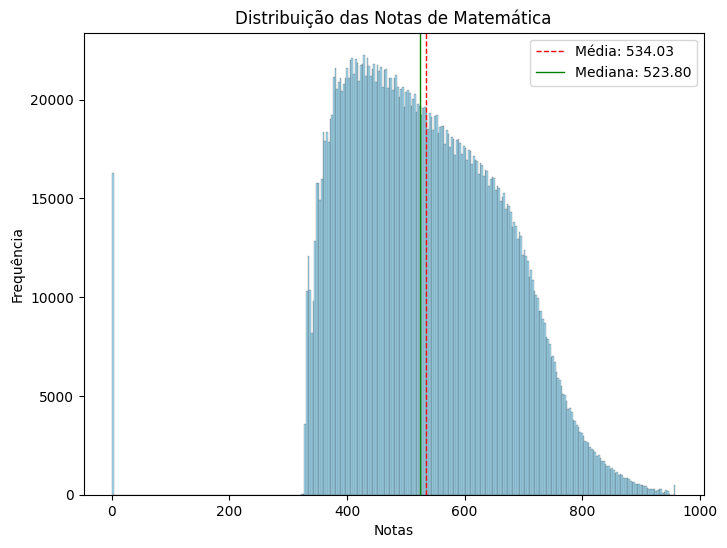

In [67]:
plot_histogram('NU_NOTA_MT')

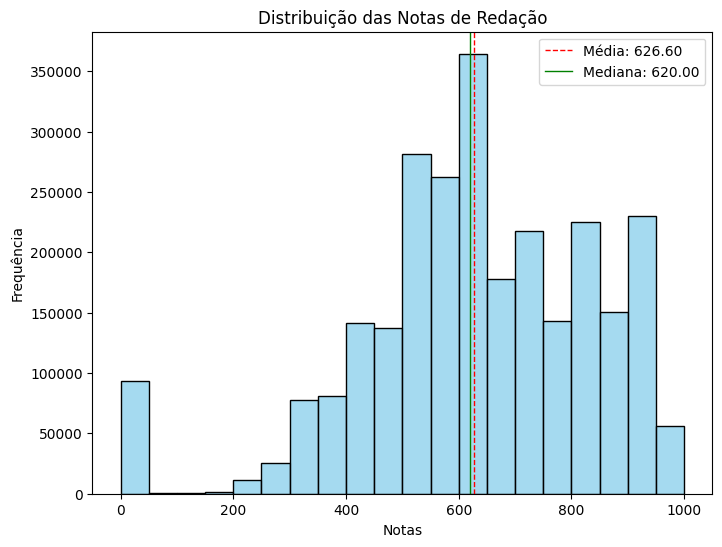

In [74]:
# Dados filtrados para a redação
notas_redacao = data_filtrada['NU_NOTA_REDACAO']

# Definir o número de bins manualmente
numero_de_bins = 20

# Calcular média e mediana
mean = notas_redacao.mean()
median = notas_redacao.median()

# Plotar histograma para a redação com o número de bins definido manualmente
plt.figure(figsize=(8, 6))
sns.histplot(notas_redacao, bins=numero_de_bins, kde=False, color='skyblue')

# Plotar linhas para média e mediana
plt.axvline(mean, color='r', linestyle='--', linewidth=1, label=f'Média: {mean:.2f}')
plt.axvline(median, color='g', linestyle='-', linewidth=1, label=f'Mediana: {median:.2f}')

plt.title('Distribuição das Notas de Redação')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.legend()
plt.show()


# Avaliando as notas de acordo com o tipo de escola

Será que o tipo de escola que o aluno frequentou no Ensino Médio tem alguma relação com o desempenho no ENEM?

<Figure size 1500x1000 with 0 Axes>

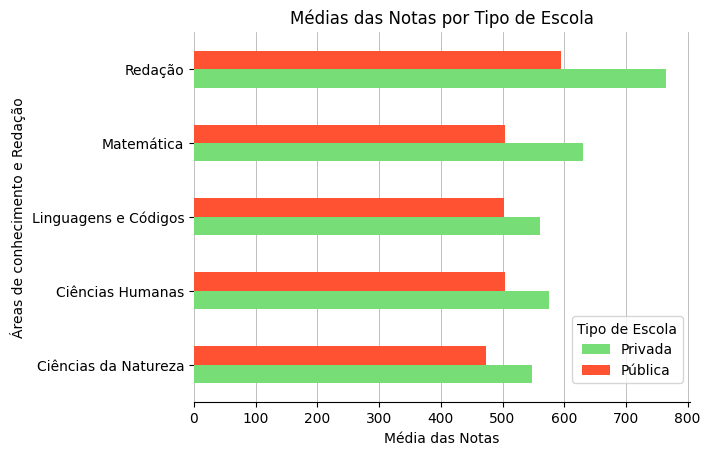

In [143]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
coluna_tipo_escola = 'TP_ESCOLA'  # Verifique o mapeamento correto

# Criar uma cópia explícita
dados_filtrados = data.dropna(subset=colunas_notas).copy()

# Mapeamento para o tipo de escola
dados_filtrados[coluna_tipo_escola].replace({2: 'Pública', 3: 'Privada'}, inplace=True)

# Continuação da filtragem
tipos_escola_filtrados = ['Privada', 'Pública']
dados_filtrados = dados_filtrados[dados_filtrados[coluna_tipo_escola].isin(tipos_escola_filtrados)]

# Médias das notas por tipo de escola
media_notas_por_tipo_escola_disciplina = dados_filtrados.groupby([coluna_tipo_escola])[colunas_notas].mean()

# Labels e cores
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
cores = ['#77dd77', '#ff5232']

# Plotagem
plt.figure(figsize=(15, 10))
ax = media_notas_por_tipo_escola_disciplina.T.plot(kind='barh', color=cores)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
plt.title('Médias das Notas por Tipo de Escola')
plt.xlabel('Média das Notas')
plt.ylabel('Áreas de conhecimento e Redação')
plt.yticks(range(len(labels)), labels)
ax.legend(tipos_escola_filtrados, title='Tipo de Escola', loc='upper right', bbox_to_anchor=(1, 0.25))
plt.show()

O gráfico apresenta a comparação entre as médias das notas por tipo de escola (privada e pública) em diferentes áreas de conhecimento do ENEM. Podemos observar algumas tendências interessantes:

**Desempenho Superior das Escolas Privadas**: Em todas as áreas do conhecimento, incluindo Redação, Matemática, Linguagens e Códigos, Ciências Humanas e Ciências da Natureza, as escolas privadas apresentam médias de notas superiores às das escolas públicas. Isso sugere que os estudantes de escolas privadas, em geral, têm um desempenho melhor no ENEM.

**Maior Discrepância em Matemática e na Redação**: A diferença entre as médias das notas de escolas privadas e públicas é particularmente marcante em Matemática e Redação. Isso pode indicar diferenças na qualidade ou quantidade de ensino e recursos disponíveis para estudantes em escolas privadas versus públicas nesta disciplina.

**Implicações para Políticas Educacionais**: Os dados sugerem que pode haver uma necessidade de revisão e potencial reforço de recursos e métodos de ensino nas escolas públicas para reduzir a disparidade educacional. Investimentos em melhorias em áreas críticas, como Matemática, poderiam ajudar a elevar o desempenho dos estudantes em escolas públicas.

# Avaliando as notas de acordo com o sexo dos participantes

Será que o sexo dos participantes tem alguma influência nas notas obtidas nas diferentes áreas de conhecimento e na redação?

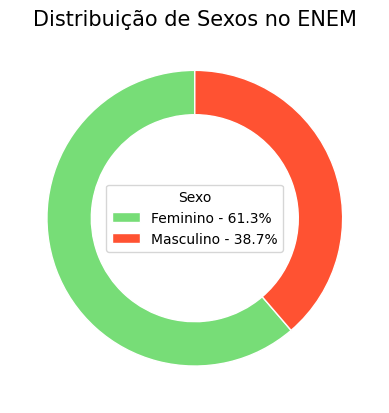

In [153]:
# Contar a quantidade de cada sexo no DataFrame
distribuicao_sexos = data['TP_SEXO'].value_counts()

# Definir as cores para cada sexo
cores = ['#77dd77', '#ff5232']

# Criar o gráfico de donut
fig, ax = plt.subplots()
wedges, texts = ax.pie(distribuicao_sexos, startangle=90, colors=cores, wedgeprops=dict(width=0.3, edgecolor='w'))

# Adicionar círculo branco no meio para criar o efeito de donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Sexos no ENEM', fontsize=15)

# Preparar as legendas com porcentagens
percentages = [f'{label} - {percent:.1f}%' for label, percent in zip(distribuicao_sexos.index, 100 * distribuicao_sexos / distribuicao_sexos.sum())]
legend = ax.legend(wedges, percentages, title="Sexo", loc="center", prop={'size': 10})

plt.show()

<Figure size 1500x1000 with 0 Axes>

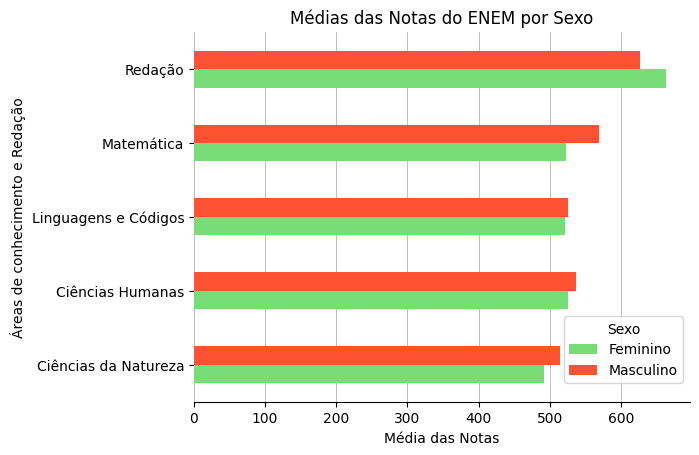

In [149]:
colunas_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# Criar uma cópia explícita e remover notas zero
dados_filtrados = data.dropna(subset=colunas_notas).copy()
for coluna in colunas_notas:
    dados_filtrados = dados_filtrados[dados_filtrados[coluna] != 0]

# Agrupar por sexo e calcular as médias
media_notas_por_sexo = dados_filtrados.groupby('TP_SEXO')[colunas_notas].mean()

# Labels e cores
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
cores = ['#77dd77', '#ff5232']

# Plotagem
plt.figure(figsize=(15, 10))
ax = media_notas_por_sexo.T.plot(kind='barh', color=cores)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)
plt.title('Médias das Notas do ENEM por Sexo')
plt.xlabel('Média das Notas')
plt.ylabel('Áreas de conhecimento e Redação')
plt.yticks(range(len(labels)), labels)
ax.legend(['Feminino', 'Masculino'], title='Sexo', loc='upper right', bbox_to_anchor=(1, 0.25))
plt.show()

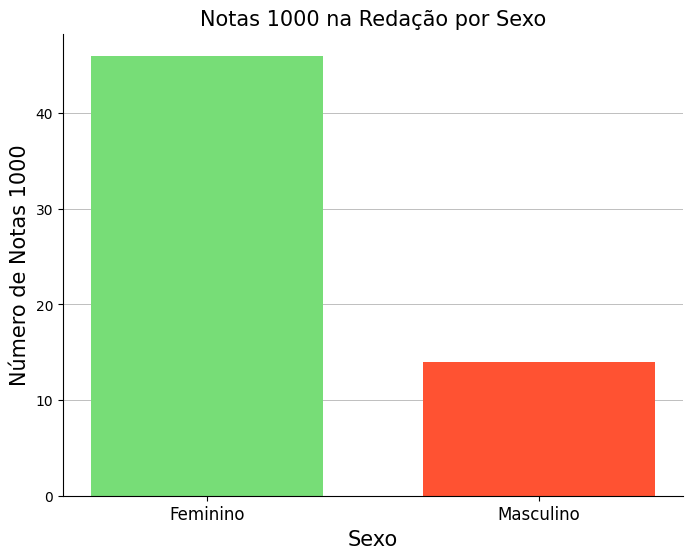

In [75]:
# Filtrar apenas as linhas com notas 1000
filtered_dataframe = data[data['NU_NOTA_REDACAO'] == 1000].copy()

# Mapear os valores de sexo para números (feminino = 0, masculino = 1)
filtered_dataframe['TP_SEXO'] = filtered_dataframe['TP_SEXO'].map({'F': 0, 'M': 1})

# Criar um DataFrame com a contagem de notas 1000 por sexo
count_by_sex = filtered_dataframe['TP_SEXO'].value_counts().sort_index()

# Definir cores para as barras
colors = ['#77dd77', '#ff5232']

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))  # Tamanho do gráfico
bars = plt.bar(count_by_sex.index, count_by_sex.values, color=colors, width=0.7)

plt.xlabel('Sexo', fontsize=15)
plt.ylabel('Número de Notas 1000', fontsize=15)
plt.title('Notas 1000 na Redação por Sexo', fontsize=15)
plt.xticks(count_by_sex.index, ['Feminino', 'Masculino'], fontsize=12)

# Remover bordas do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(True)

# Adicionar grid
plt.gca().set_axisbelow(True)
plt.gca().yaxis.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.7)

plt.show()

Este gráfico mostra a distribuição de notas máximas (1000) na redação do ENEM, separadas por sexo. As observações principais incluem:

**Desempenho Superior Feminino**: Há um número significativamente maior de candidatas do sexo feminino que alcançaram a nota máxima na redação comparado aos candidatos do sexo masculino. Isso sugere que as candidatas femininas, em geral, se saíram melhor na redação.

**Implicações sobre Habilidades de Escrita**: A disparidade nas notas pode refletir diferenças nas habilidades de escrita entre os sexos. Estudos anteriores sugerem que meninas frequentemente desenvolvem habilidades de leitura e escrita mais cedo do que meninos, o que pode influenciar os resultados em avaliações de redação.[referencia]

**Considerações Educacionais**: Este resultado pode motivar uma análise mais aprofundada das estratégias pedagógicas no ensino de habilidades de escrita nas escolas, particularmente para entender e mitigar as diferenças de desempenho entre os sexos.

**Contexto Social e Cultural**: As diferenças também podem estar influenciadas por fatores sociais e culturais que afetam a maneira como meninos e meninas são educados em relação às habilidades de comunicação e expressão.

# Avaliando as notas de acordo com a Cor/Raça dos participantes

Será que a cor/raça dos participantes tem alguma influência nas notas obtidas nas diferentes áreas de conhecimento e na redação?

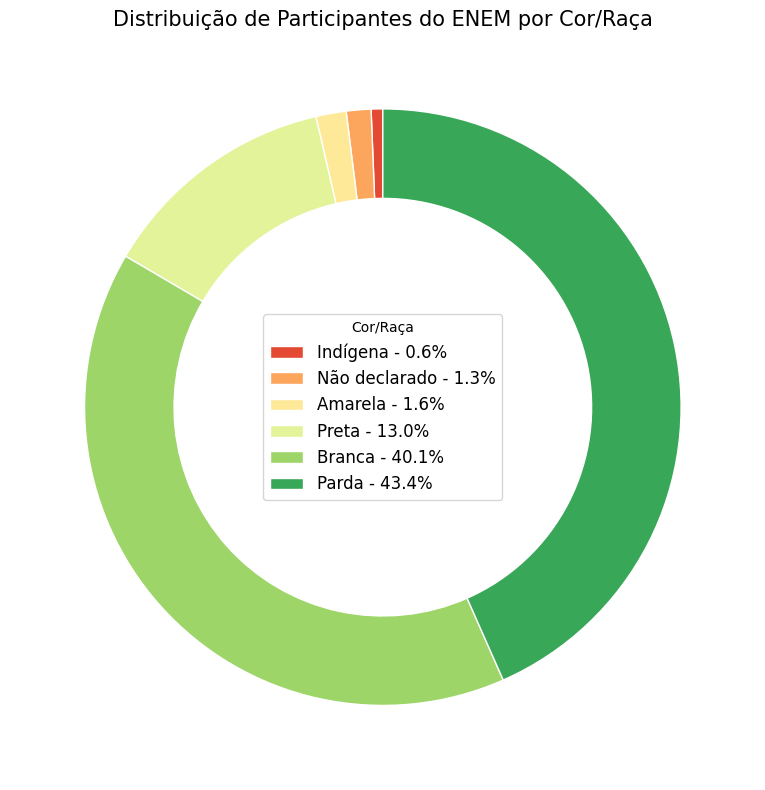

In [97]:
# Calculando a distribuição de participantes por cor/raça
distribuicao_participantes_por_raca = data['Cor_Raca_Desc'].value_counts(normalize=True).sort_values()

# Definir cores usando a paleta de cores "RdYlGn"
cores = sns.color_palette("RdYlGn", n_colors=len(distribuicao_participantes_por_raca))

# Criar o gráfico de donut
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(distribuicao_participantes_por_raca, labels=None, autopct=None, startangle=90, colors=cores, wedgeprops=dict(width=0.3, edgecolor='w'), pctdistance=0.85)

# Adicionar círculo branco no meio para criar o efeito de donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Distribuição de Participantes do ENEM por Cor/Raça', fontsize=15)

# Criar legenda no centro do donut incluindo as porcentagens
labels = [f'{label} - {pct*100:.1f}%' for label, pct in zip(distribuicao_participantes_por_raca.index, distribuicao_participantes_por_raca)]
ax.legend(wedges, labels, title="Cor/Raça", loc="center", prop={'size': 12})

plt.tight_layout()
plt.show()

In [104]:
def plot_average_scores_by_category(data, score_column, category_column, title, xlabel):
    """
    Plota as médias de notas por categorias específicas, excluindo a categoria 'Não declarado'.

    Args:
    data (DataFrame): DataFrame contendo os dados.
    score_column (str): Nome da coluna contendo as notas.
    category_column (str): Nome da coluna contendo as categorias.
    title (str): Título do gráfico.
    xlabel (str): Rótulo do eixo X.
    """
    # Filtrar a categoria 'Não declarado'
    filtered_data = data[data[category_column] != 'Não declarado']
    
    # Calculando as médias das notas por categoria
    average_scores_by_category = filtered_data.groupby(category_column)[score_column].mean().sort_values()

    # Definir cores usando a paleta de cores "RdYlGn"
    colors = sns.color_palette("RdYlGn", n_colors=len(average_scores_by_category))

    # Criar o gráfico de barras horizontais
    plt.figure(figsize=(12, 6))
    bars = plt.barh(average_scores_by_category.index, average_scores_by_category, color=colors)

    plt.xlabel(xlabel, fontsize=15)
    plt.title(title, fontsize=15)
    plt.grid(True, linestyle='--', which='both', alpha=0.5)

    # Remover as bordas superior e direita
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Deixar grades atrás das barras
    plt.gca().set_axisbelow(True)

    # Adicionar valores das médias nas barras
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
                 va='center', ha='left', fontsize=12, color='black')

    plt.tight_layout()
    plt.show()

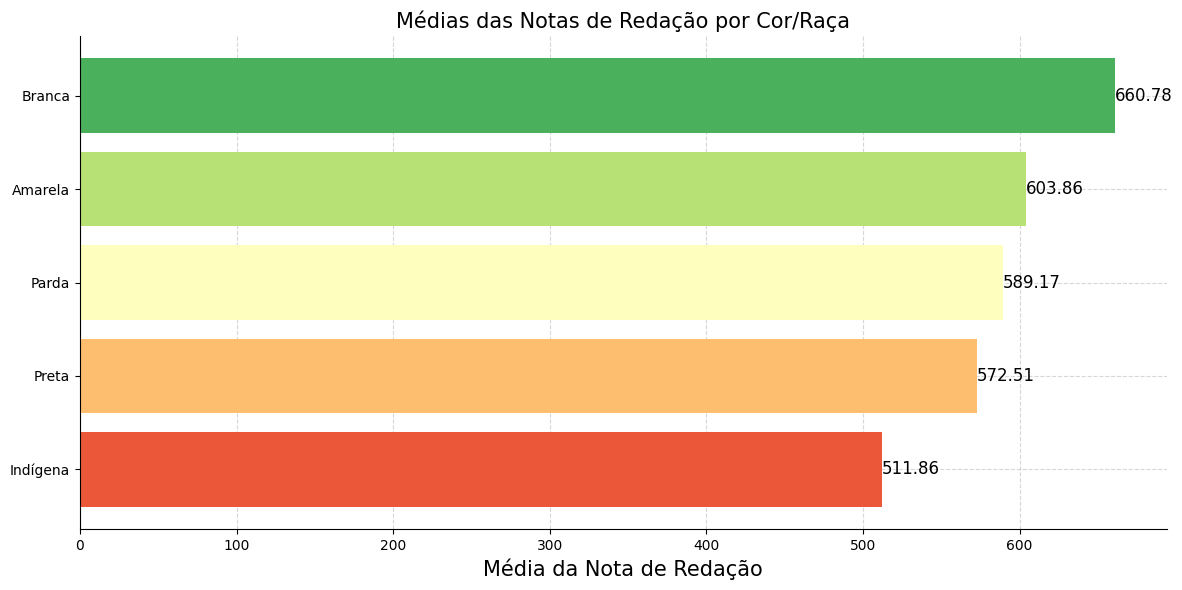

In [105]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_REDACAO', 'Cor_Raca_Desc', 'Médias das Notas de Redação por Cor/Raça', 'Média da Nota de Redação')

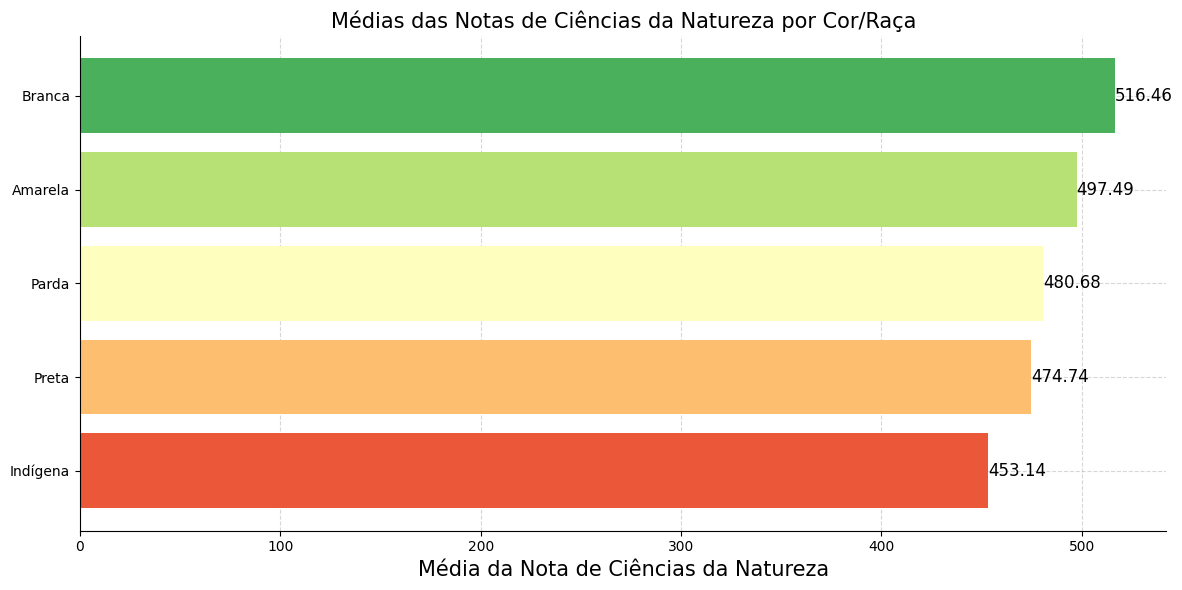

In [106]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_CN', 'Cor_Raca_Desc', 'Médias das Notas de Ciências da Natureza por Cor/Raça', 'Média da Nota de Ciências da Natureza')

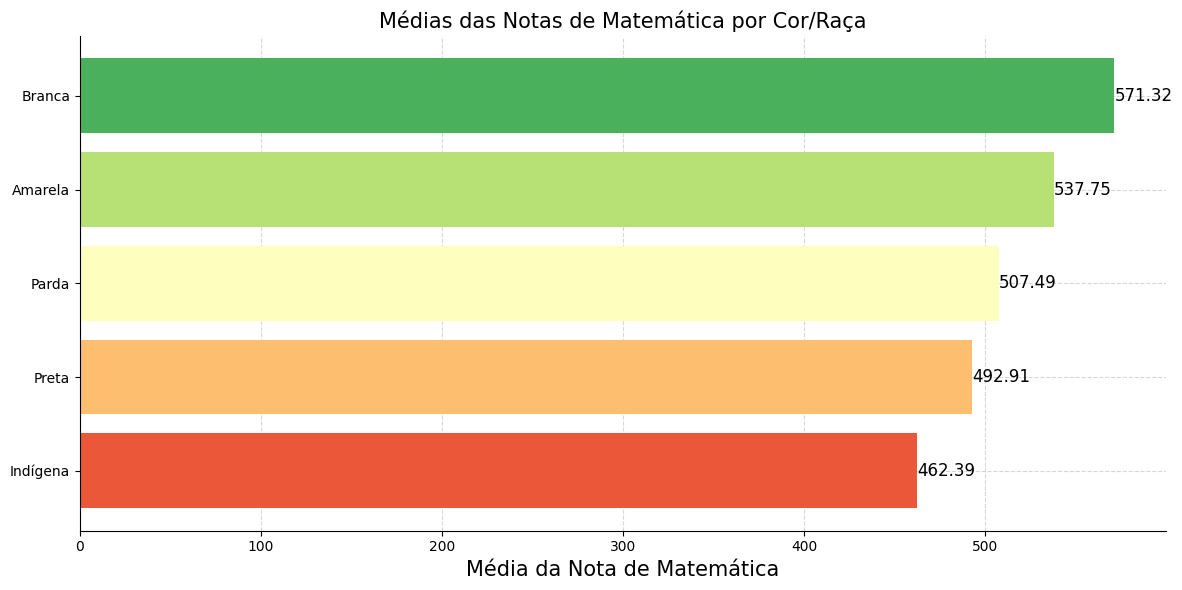

In [107]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_MT', 'Cor_Raca_Desc', 'Médias das Notas de Matemática por Cor/Raça', 'Média da Nota de Matemática')

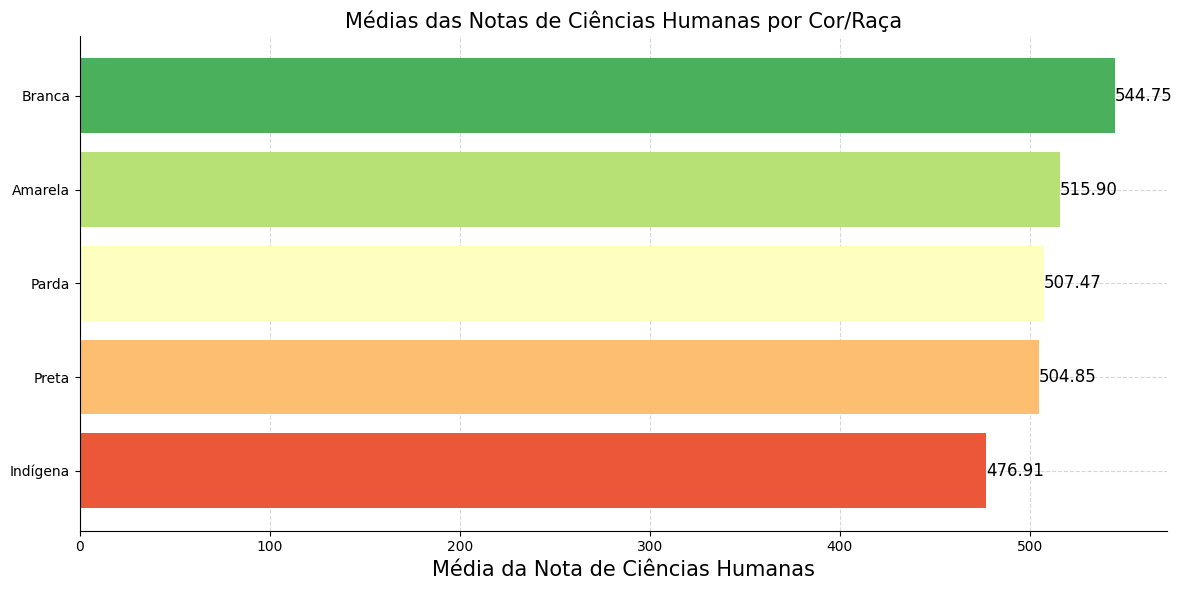

In [108]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_CH', 'Cor_Raca_Desc', 'Médias das Notas de Ciências Humanas por Cor/Raça', 'Média da Nota de Ciências Humanas')

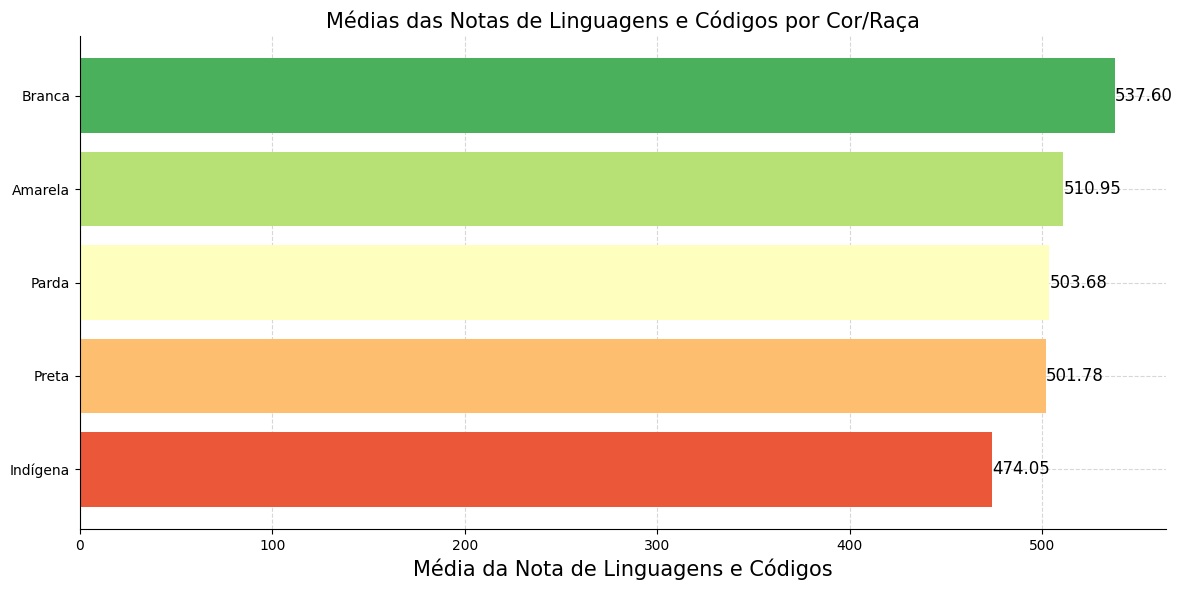

In [109]:
# Chamando a função
plot_average_scores_by_category(data, 'NU_NOTA_LC', 'Cor_Raca_Desc', 'Médias das Notas de Linguagens e Códigos por Cor/Raça', 'Média da Nota de Linguagens e Códigos')

# Avaliando as notas de acordo com a faixa socioeconômica

# Avaliando as notas de acordo com o estado dos participantes

In [128]:
def plot_state_average_scores(data, score_column, state_column, title):
    """
    Plota as médias das notas por estado num mapa do Brasil.

    Args:
    data (DataFrame): DataFrame contendo os dados das notas.
    score_column (str): Coluna que contém as notas.
    state_column (str): Coluna que contém as siglas dos estados.
    title (str): Título do gráfico.
    """
    # Carregar o shapefile do Brasil
    brazil = gpd.read_file('BR_UF_2022/BR_UF_2022.shp')

    # Agrupar os dados por estado e calcular a média das notas
    average_scores_by_state = data.groupby(state_column)[score_column].mean().reset_index()

    # Mesclar o dataframe geopandas com as médias das notas
    brazil_scores = brazil.merge(average_scores_by_state, left_on='SIGLA_UF', right_on=state_column)

    # Ordenar os dataframes pela média das notas
    brazil_scores = brazil_scores.sort_values(by=score_column, ascending=False)

    # Plotar as médias das notas
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    brazil_scores.boundary.plot(ax=ax, linewidth=0.5, color='black')  # Linhas mais finas
    brazil_scores.plot(column=score_column, cmap='RdYlGn', linewidth=0.1, ax=ax, edgecolor='0.8', legend=False)

    # Adicionar as médias das notas como texto sobre os estados
    for idx, row in brazil_scores.iterrows():
        x, y = row['geometry'].centroid.x, row['geometry'].centroid.y
        if row['SIGLA_UF'] == 'DF':
            y += 0.5  # Ajuste vertical para o DF
        text = plt.annotate(text=f"{row['SIGLA_UF']} - {row[score_column]:.0f}", xy=(x, y),
                            horizontalalignment='center', verticalalignment='center', color='white', fontsize=10)
        text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='black')])

    ax.set_title(title, fontsize=20, fontweight='bold')
    ax.axis('off')

    plt.tight_layout()
    plt.show()

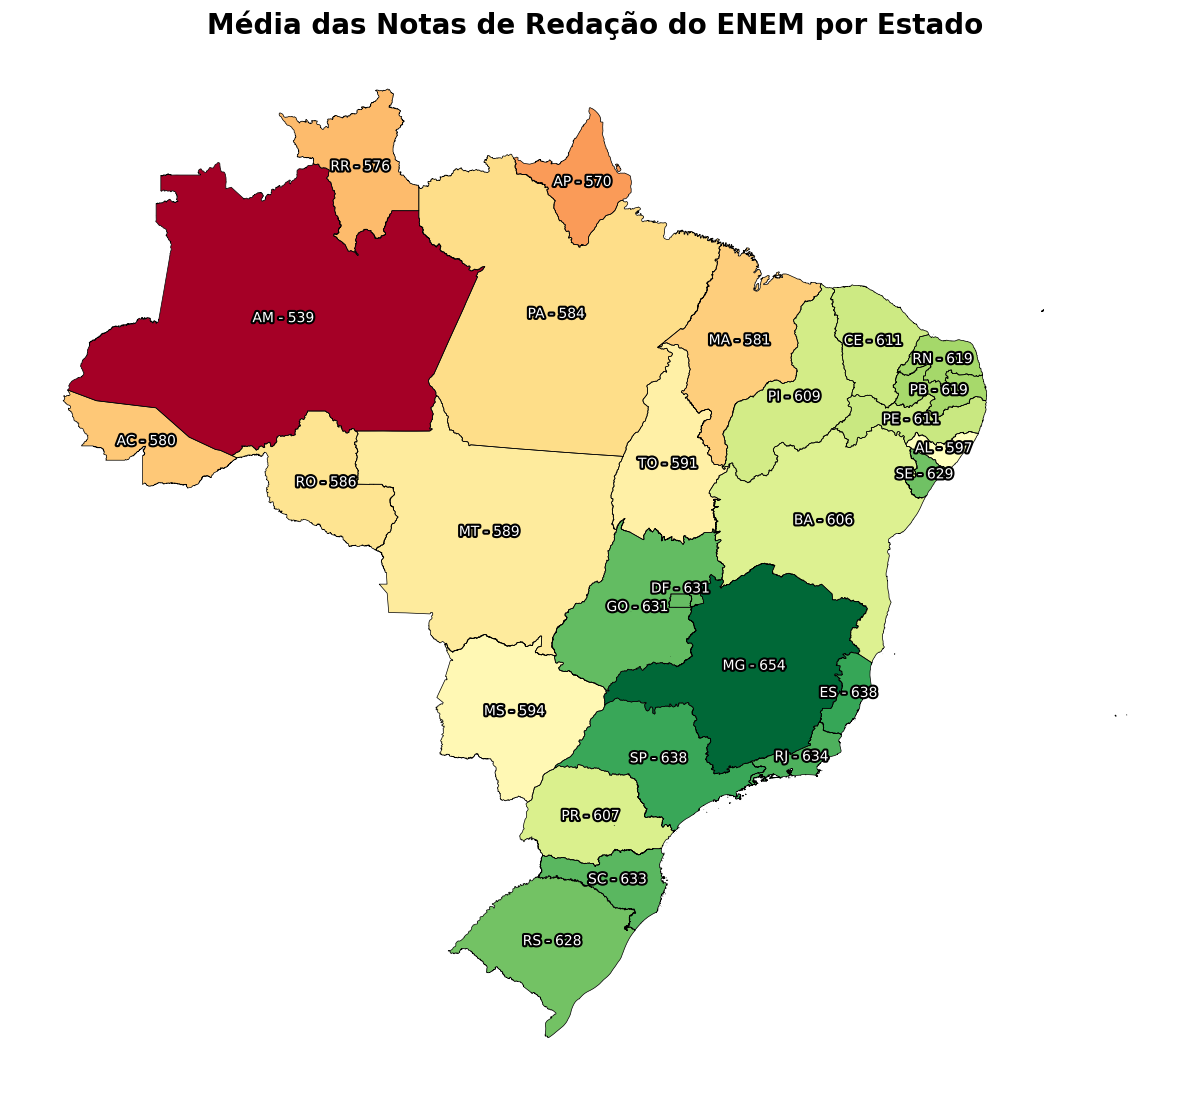

In [129]:
plot_state_average_scores(data, 'NU_NOTA_REDACAO', 'SG_UF_PROVA', 'Média das Notas de Redação do ENEM por Estado')

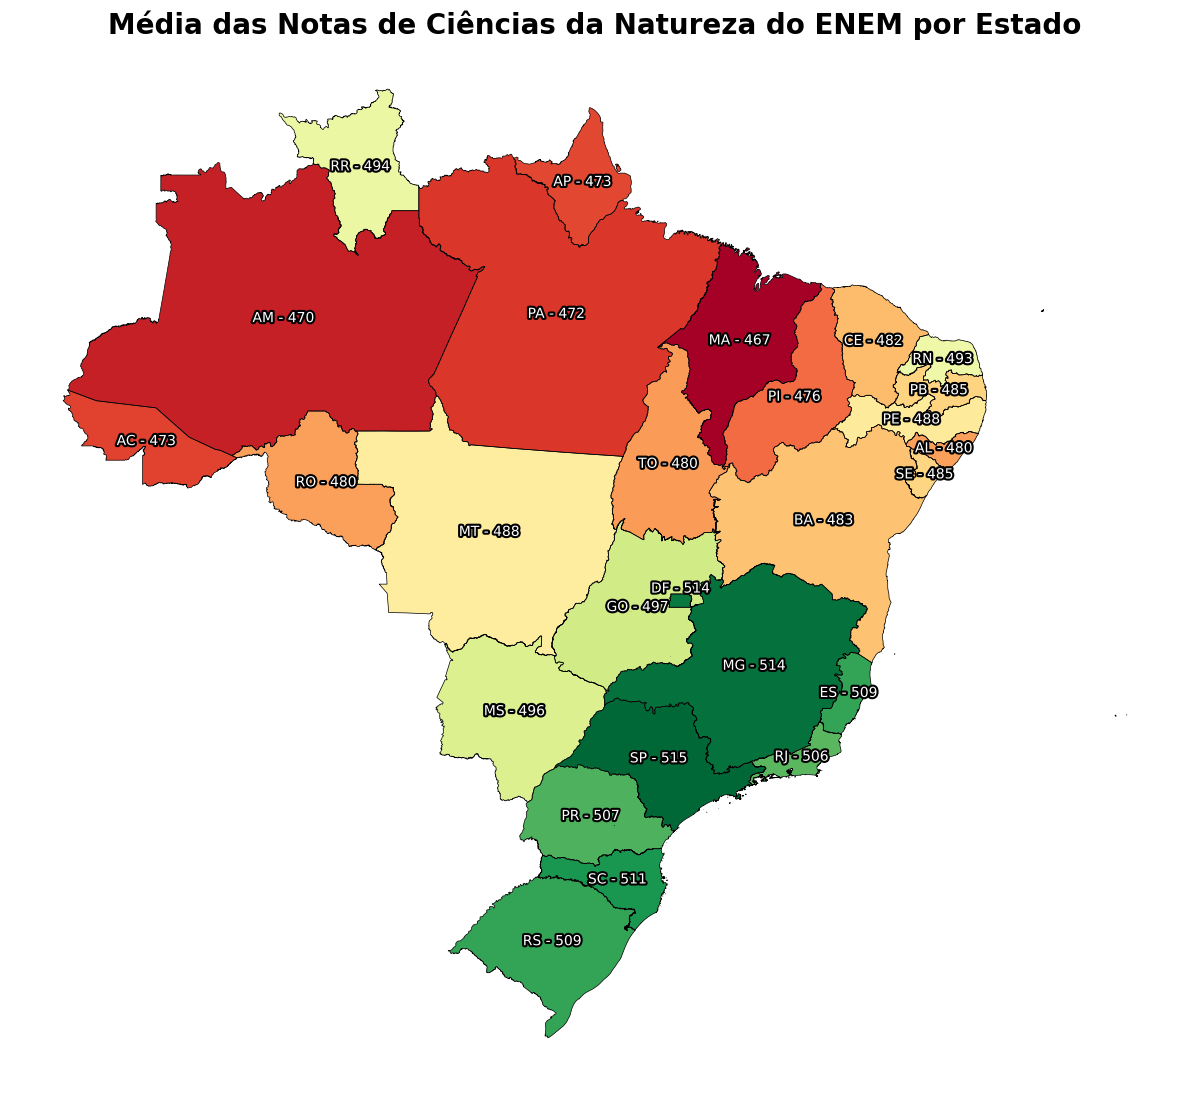

In [130]:
plot_state_average_scores(data, 'NU_NOTA_CN', 'SG_UF_PROVA', 'Média das Notas de Ciências da Natureza do ENEM por Estado')

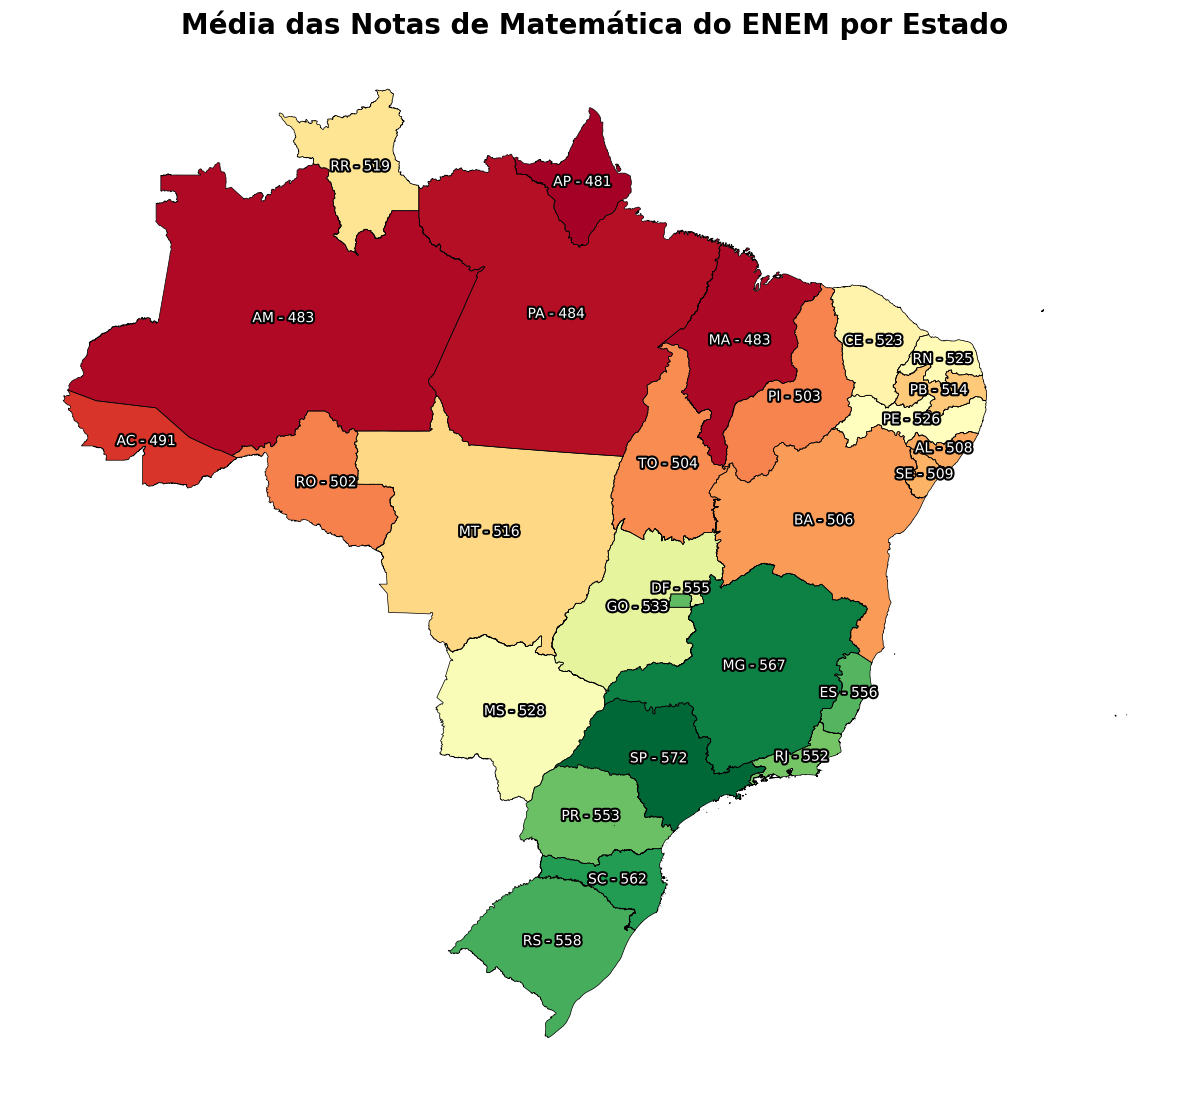

In [131]:
plot_state_average_scores(data, 'NU_NOTA_MT', 'SG_UF_PROVA', 'Média das Notas de Matemática do ENEM por Estado')

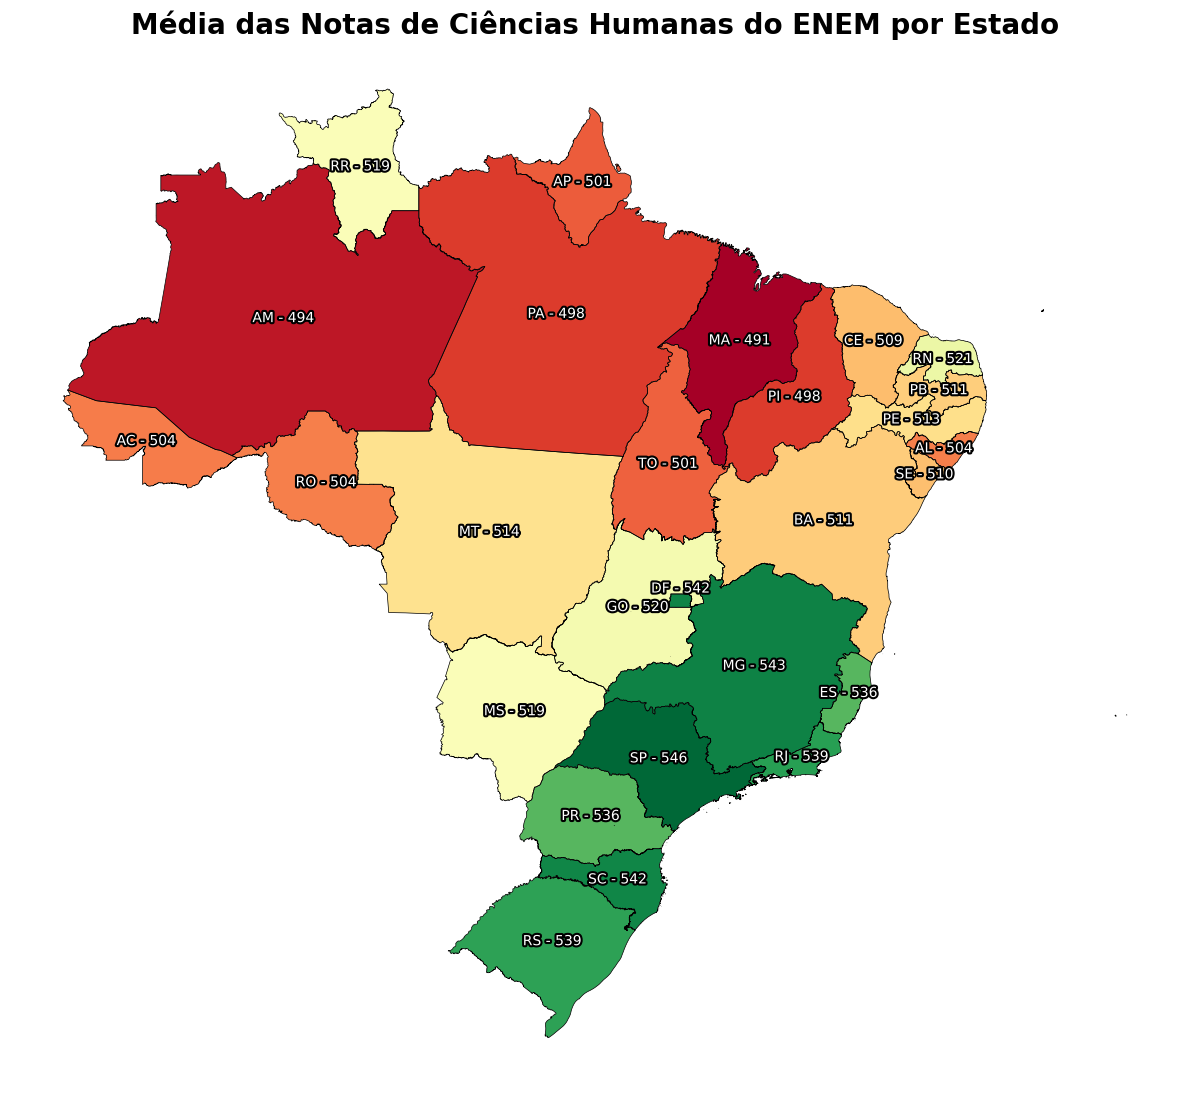

In [132]:
plot_state_average_scores(data, 'NU_NOTA_CH', 'SG_UF_PROVA', 'Média das Notas de Ciências Humanas do ENEM por Estado')

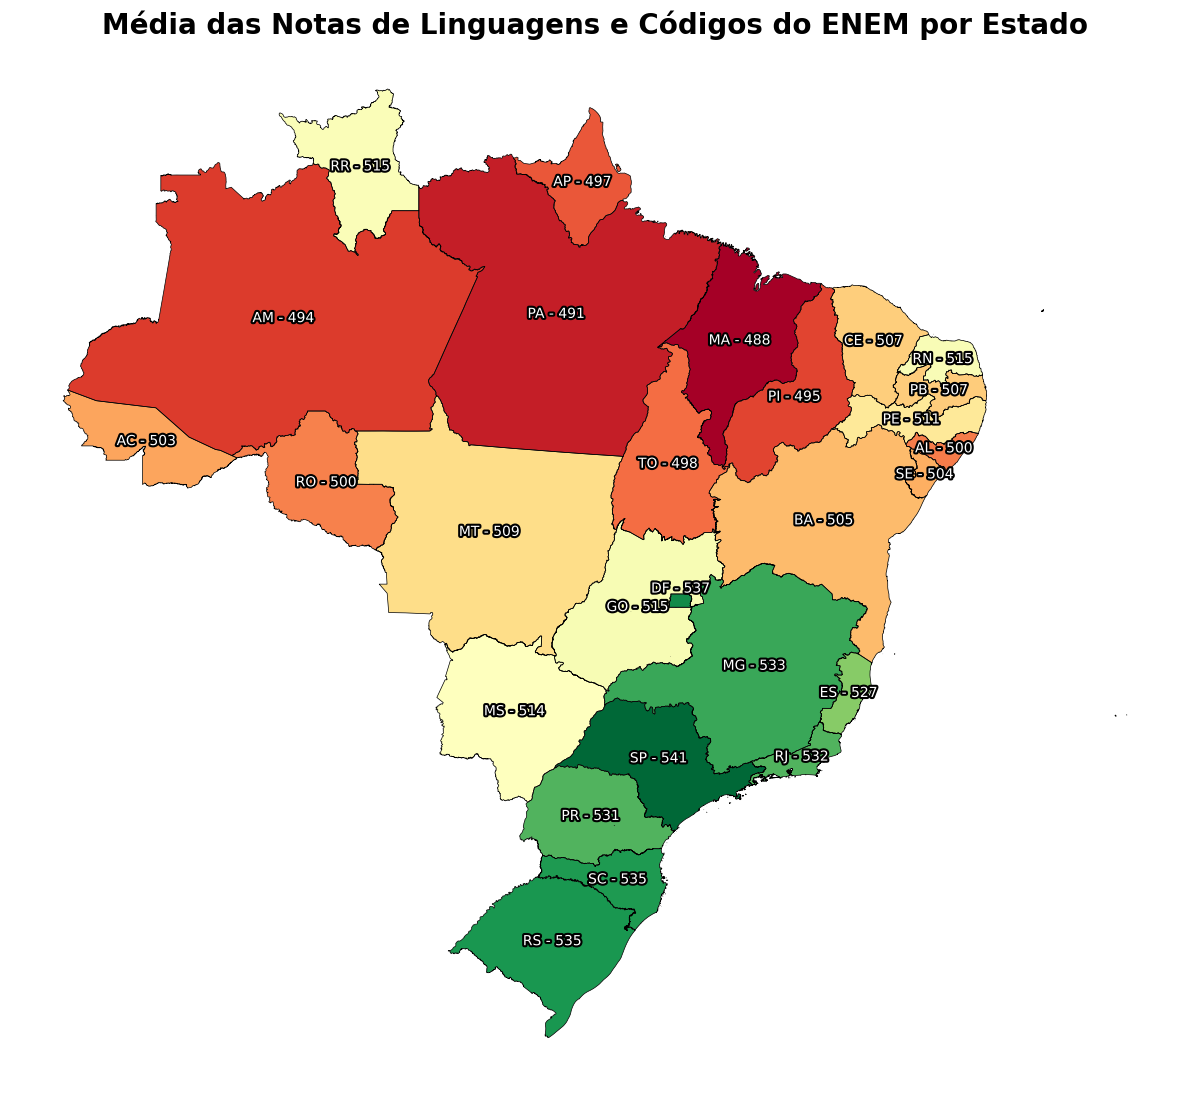

In [133]:
plot_state_average_scores(data, 'NU_NOTA_LC', 'SG_UF_PROVA', 'Média das Notas de Linguagens e Códigos do ENEM por Estado')